<h1 style="font-size: 5em; color: #0000FF; text-shadow: 4px 4px 4px #000000, 0 0 10px #0000FF, 0 0 20px #0000FF; text-align: center; font-weight: bold; text-transform: uppercase;">Network Intrusions Detection Case Study
</h1>

# Business Objective:

With the enormous growth of computer networks usage and the huge increase in the number of 
applications running on top of it, network security is becoming increasingly more important. All the 
computer systems suffer from security vulnerabilities which are both technically difficult and 
economically costly to be solved by the manufacturers. Therefore, the role of Intrusion Detection 
Systems (IDSs), as special-purpose devices to detect anomalies and attacks in the network, is 
becoming more important. 

The research in the intrusion detection field has been mostly focused on anomaly-based and misusebased detection techniques for a long time. While misuse-based detection is generally favoured in 
commercial products due to its predictability and high accuracy, in academic research anomaly 
detection is typically conceived as a more powerful method due to its theoretical potential for 
addressing novel attacks.

As part of this project, your task is to build network intrusion detection system to detect anomalies 
and attacks in the network.

There are two problems

Binomial classification: Detect anomalies by predicting Activity is normal or attack

Multinomial Classification: Detecting type of activity by predicting Activity is Normal or Back or 
Buffer Over flow or FTP Write or Guess Password or Neptune or N-Map or Port Sweep or Root Kit or 
Satan or Smurf

# Available Data:

Organization captured the data over the period of time for different types of attacks and provided 
the data in different files for different type of activities along with normal.

### a. Data_of_Attack_Back_NormalBack_Smurf

### b. Data_of_Attack_Back

### c. Data_of_Attack_Back_BufferOverflow

### d. Data_of_Attack_Back_FTPWrite

### e. Data_of_Attack_Back_GuessPassword

### f. Data_of_Attack_Back_Neptune

### g. Data_of_Attack_Back_NMap

### h. Data_of_Attack_Back_PortSweep

### i. Data_of_Attack_Back_RootKit

### j. Data_of_Attack_Back_Satan

### k. Data_of_Attack_Back_Smurf

#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Packages related to data visualizaiton
import matplotlib.pyplot as plt
import seaborn as sns

#Package Related to warnings
import warnings 
warnings.filterwarnings("ignore")

#Modules related to split the data 
from sklearn.model_selection import train_test_split 

#Module related to Pipeline Creation
from sklearn.pipeline import Pipeline

##Moudles related to feature selection
from sklearn.feature_selection import SelectKBest ,f_classif

##Moudles related to feature scaleing
from sklearn.preprocessing import MinMaxScaler , RobustScaler
#Modules related key techniques of supervised learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#Modules related to evaluation metrices
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score ,classification_report ,recall_score

In [2]:
df_1=pd.read_csv("D:/A LABS FLODER/ML using python/CASE STUDYS/Cyber Security Case Study/Data_of_Attack_Back.csv")
df_1['Attack_type']="unknown"

df_2=pd.read_csv("D:/A LABS FLODER/ML using python/CASE STUDYS/Cyber Security Case Study/Data_of_Attack_Back_BufferOverflow.csv")
df_2['Attack_type']="BufferOverflow"

df_3=pd.read_csv("D:/A LABS FLODER/ML using python/CASE STUDYS/Cyber Security Case Study/Data_of_Attack_Back_FTPWrite.csv")
df_3['Attack_type']="FTPWrite"

df_4=pd.read_csv("D:/A LABS FLODER/ML using python/CASE STUDYS/Cyber Security Case Study/Data_of_Attack_Back_GuessPassword.csv")
df_4['Attack_type']="GuessPassword"

df_5=pd.read_csv("D:/A LABS FLODER/ML using python/CASE STUDYS/Cyber Security Case Study/Data_of_Attack_Back_Neptune.csv")
df_5['Attack_type']="Neptune"

df_6=pd.read_csv("D:/A LABS FLODER/ML using python/CASE STUDYS/Cyber Security Case Study/Data_of_Attack_Back_NMap.csv")
df_6['Attack_type']="NMap"

df_7=pd.read_csv("D:/A LABS FLODER/ML using python/CASE STUDYS/Cyber Security Case Study/Data_of_Attack_Back_Normal.csv")
df_7['Attack_type']="Normal"

df_8=pd.read_csv("D:/A LABS FLODER/ML using python/CASE STUDYS/Cyber Security Case Study/Data_of_Attack_Back_PortSweep.csv")
df_8['Attack_type']="PortSweep"

df_9=pd.read_csv("D:/A LABS FLODER/ML using python/CASE STUDYS/Cyber Security Case Study/Data_of_Attack_Back_RootKit.csv")
df_9['Attack_type']="RootKit"

df_10=pd.read_csv("D:/A LABS FLODER/ML using python/CASE STUDYS/Cyber Security Case Study/Data_of_Attack_Back_Satan.csv")
df_10['Attack_type']="Satan"

df_11=pd.read_csv("D:/A LABS FLODER/ML using python/CASE STUDYS/Cyber Security Case Study/Data_of_Attack_Back_Smurf.csv")
df_11['Attack_type']="Smurf"

In [3]:
#Created a flag for normal vs attack activity
# Create Y Binomial variable
# 0 --> Normal , 1--> Attack
df_7['attack_flag']=0

In [4]:
df=pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11],axis=0)

In [5]:
df.shape

(817551, 43)

In [6]:
df.fillna(1,inplace=True)

In [7]:
df.shape

(817551, 43)

In [8]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack_type,attack_flag
0,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,unknown,1.0
1,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,unknown,1.0
2,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,unknown,1.0
3,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,unknown,1.0
4,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.1,0.0,0.020,0.0,0.0,0.0,0.0,0.0,unknown,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817551 entries, 0 to 3006
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      817551 non-null  float64
 1    protocol_type                817551 non-null  float64
 2    service                      817551 non-null  float64
 3    flag                         817551 non-null  float64
 4    src_bytes                    817551 non-null  float64
 5    dst_bytes                    817551 non-null  float64
 6    land                         817551 non-null  int64  
 7    wrong_fragment               817551 non-null  float64
 8    urgent                       817551 non-null  float64
 9    hot                          817551 non-null  float64
 10   num_failed_logins            817551 non-null  float64
 11   logged_in                    817551 non-null  float64
 12   num_compromised              817551 non-null  floa

In [10]:
# checking missing values 
df.isna().sum().sum()

0

## cheching the no.of columns and rows in that data df

In [11]:
print("In this df dataframe having " + str(len(df)) + " rows and " + str(len(df.columns)) + " columns are there")

In this df dataframe having 817551 rows and 43 columns are there


## Number of numerical & categorical columns in the data set

In [12]:
num_df=df.select_dtypes(exclude='object')
obj_df=df.select_dtypes(include='object')
no_of_numericals_columns=len(num_df.columns)
no_of_categorical_columns=len(obj_df.columns)
print("In the above df dataframe having "+ str(no_of_numericals_columns)+ " numericals_columns and "+ str(no_of_categorical_columns)+ " categorical_columns are there")

In the above df dataframe having 42 numericals_columns and 1 categorical_columns are there


## Description about numericals_columns

In [13]:
def custom_description( x ):
    
    non_missing = x.isnull().count()
    missing = x.isnull().sum()
    missing_pct = missing / non_missing
    
    p25 = x.quantile(0.25)
    p75 = x.quantile(0.75)
    
    iqr = p75 - p25
    
    lc_iqr = p25 - 1.5 * iqr
    uc_iqr = p75 + 1.5 * iqr
    
    return pd.Series( [ x.dtypes, x.count(), x.nunique(), non_missing, missing, missing_pct, 
                       x.sum(), x.var(), x.std(), x.mean(), 
                       iqr, lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.50), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max()],
                     
                    index = ['dtype', 'rows','unique values', 'non_missing', 'missing', 'missing_pct',
                             'sum', 'var', 'std', 'mean',
                             'Interquartile Range', 'IQR lower bound', 'IQR upper bound',
                             'min', '1%', '5%', '10%', 
                             '25%', '50%', '75%', 
                             '90%', '95%', '99%', 'max'])

In [14]:
num_df.apply(custom_description)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_flag
dtype,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
rows,817551,817551,817551,817551,817551,817551,817551,817551,817551,817551,...,817551,817551,817551,817551,817551,817551,817551,817551,817551,817551
unique values,918,3,67,11,5908,18399,1,2,5,11,...,256,101,101,101,68,101,97,101,101,2
non_missing,817551,817551,817551,817551,817551,817551,817551,817551,817551,817551,...,817551,817551,817551,817551,817551,817551,817551,817551,817551,817551
missing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
missing_pct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,716.8347,465.68,43255.6,16481.5,4056.18442,20326.03324,0,0.3,2.1,2007.7,...,132158.195,54608.021,2763.32,5026.182,1375.607,20328.601,20317.676,4392.049,4315.787,240841.0
var,0.000709,0.000007,0.009291,0.000958,0.001105,0.00444,0.0,0.0,0.000001,0.00172,...,0.012464,0.001885,0.000073,0.000305,0.000014,0.001854,0.001862,0.00048,0.000487,0.207806
std,0.026636,0.002596,0.096389,0.030959,0.033235,0.066635,0.0,0.000332,0.000805,0.04147,...,0.111642,0.043421,0.008557,0.01746,0.003708,0.043062,0.043151,0.02192,0.02207,0.455858
mean,0.000877,0.00057,0.052909,0.02016,0.004961,0.024862,0.0,0.0,0.000003,0.002456,...,0.161651,0.066795,0.00338,0.006148,0.001683,0.024865,0.024852,0.005372,0.005279,0.294588


# Univariate & Bi Variate analysis on dataset

## Univariate analysis for numericals_columns

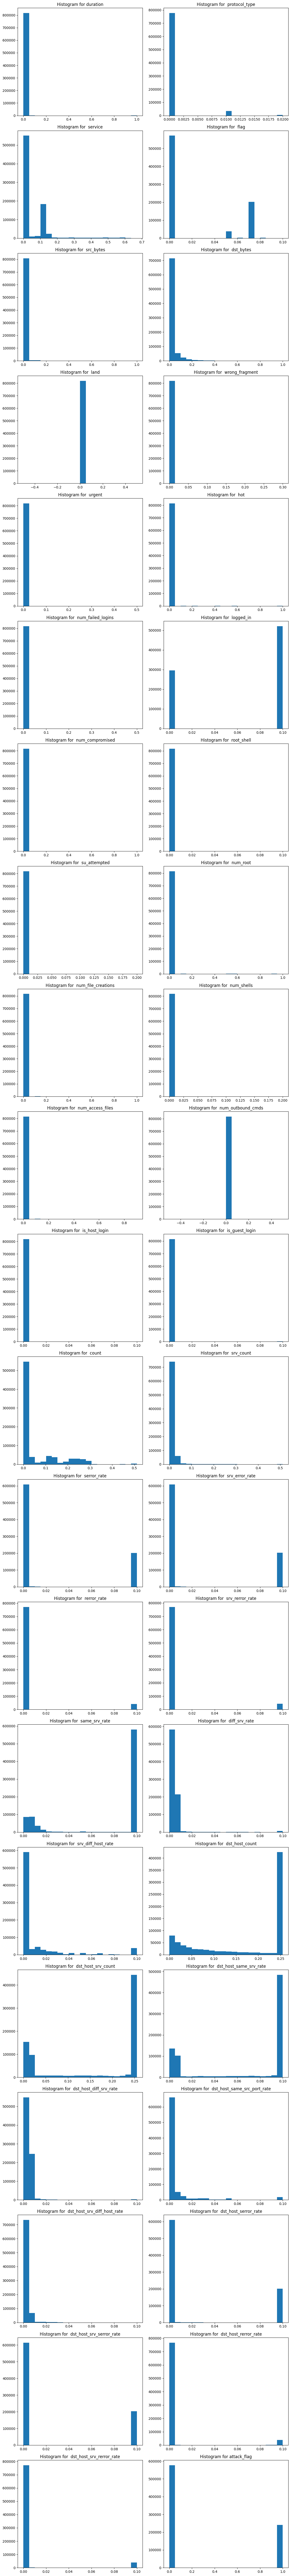

In [15]:
# Get numerical columns in the DataFrame
numerical_columns = df.select_dtypes(include=['number']).columns

# Calculate the number of subplots needed
num_subplots = len(numerical_columns)

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=num_subplots // 2 + num_subplots % 2, ncols=2, figsize=(12, 5 * (num_subplots // 2 + num_subplots % 2)))

# Loop through numerical columns
for i, column in enumerate(numerical_columns):
    # Calculate the position in the subplot grid
    row = i // 2
    col = i % 2

    # Plot histogram
    axes[row, col].hist(df[column], bins=20)
    axes[row, col].set_title(f"Histogram for {column}")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


## Univariate analysis for categorical_columns

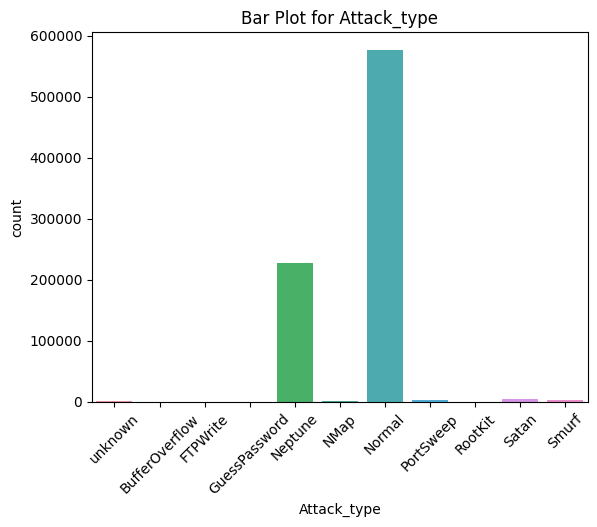

In [16]:

obj_df = df.select_dtypes(include='object')


for i in obj_df:
    sns.countplot(x=i, data=df)
    plt.title(f"Bar Plot for {i}")
    plt.xticks(rotation=45, fontsize=10)
    plt.show()


Here we can clearly see that our dataset is imbalanced some classes have very low records and some have very high

## checking Outliers in the numericals_columns in the dataset

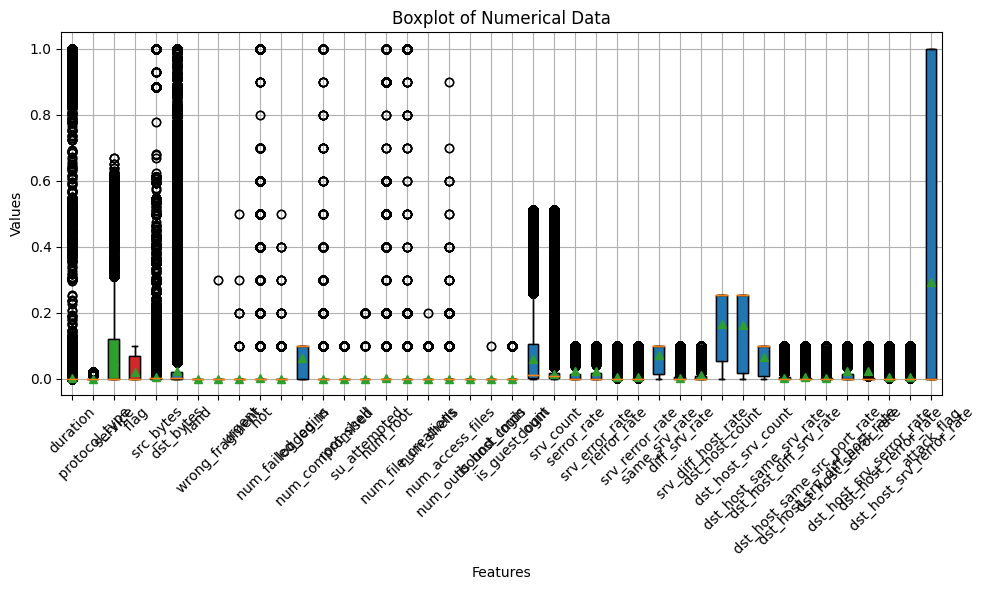

In [17]:

# Create a boxplot with customizations
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.boxplot(num_df.values, patch_artist=True, showmeans=True)
plt.title('Boxplot of Numerical Data')
plt.xlabel('Features')
plt.ylabel('Values')

# Customizing colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Custom colors for boxplot
for patch, color in zip(plt.boxplot(num_df.values, patch_artist=True)['boxes'], colors):
    patch.set_facecolor(color)

# Customizing x-axis labels
plt.xticks(range(1, len(num_df.columns) + 1), num_df.columns, rotation=45)

# Show grid for better readability
plt.grid(True)

plt.tight_layout()
plt.show()


All numerical columns have outliers

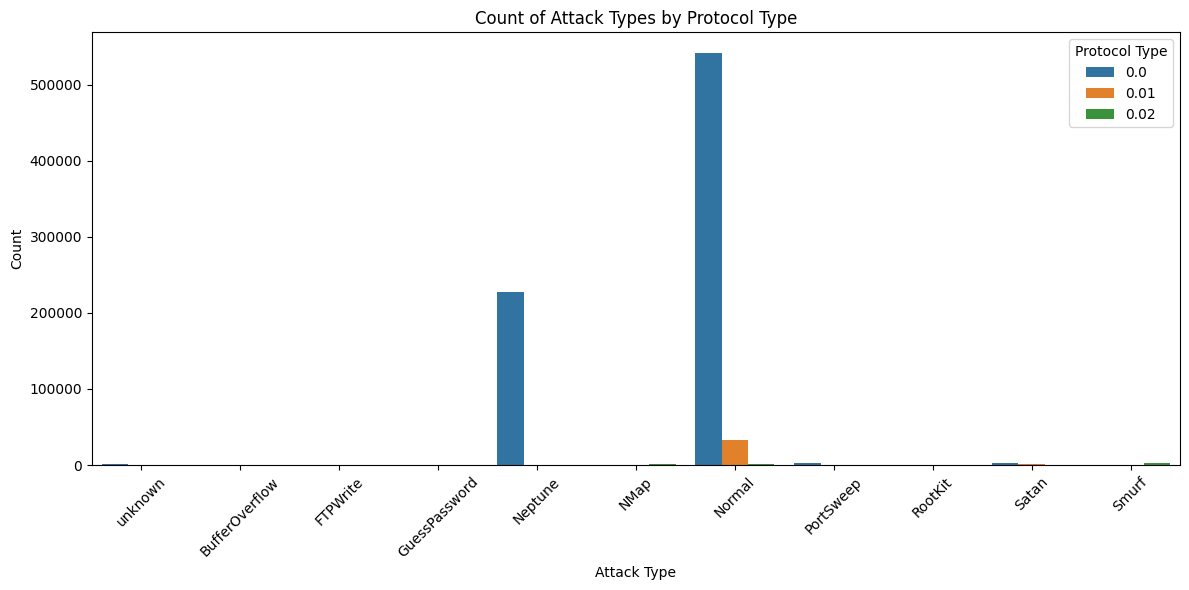

In [18]:
selected_columns = ['Attack_type', ' protocol_type']

data = df[selected_columns]
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Attack_type', hue=' protocol_type')
plt.title('Count of Attack Types by Protocol Type')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Protocol Type')
plt.tight_layout()
plt.show()


Protocol 0.0 is most susceptible to Neptune Attacks.

## Numeric vs Numeric Relationships

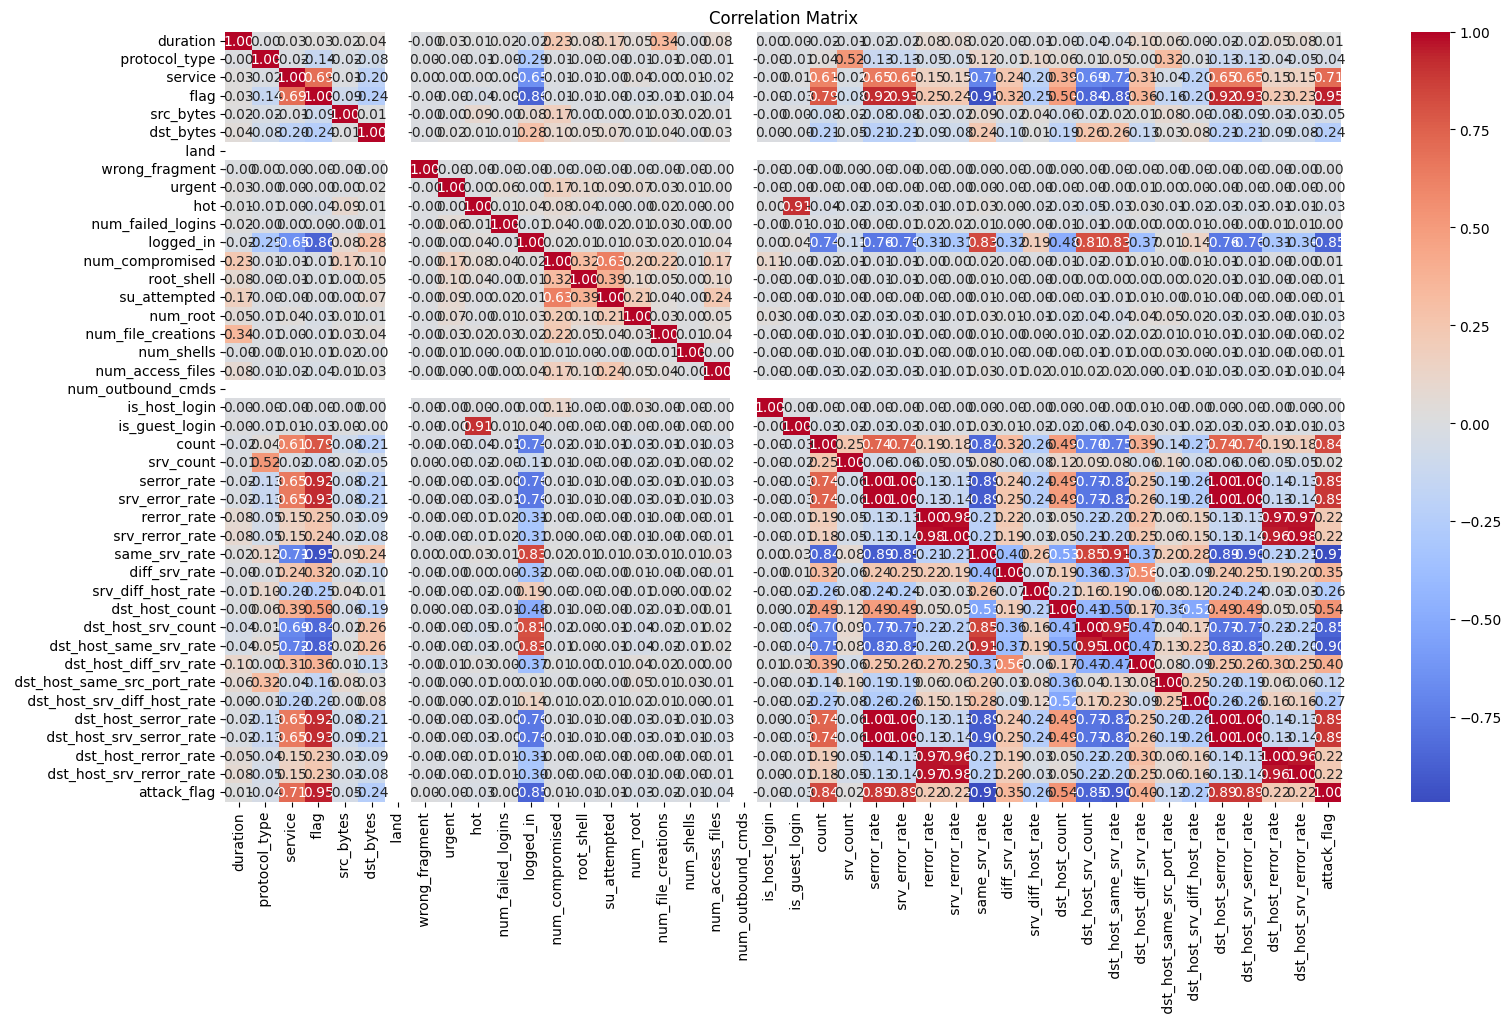

In [19]:
num_df_1=df.select_dtypes(exclude='object').columns
correlation_matrix = df[num_df_1].corr()
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

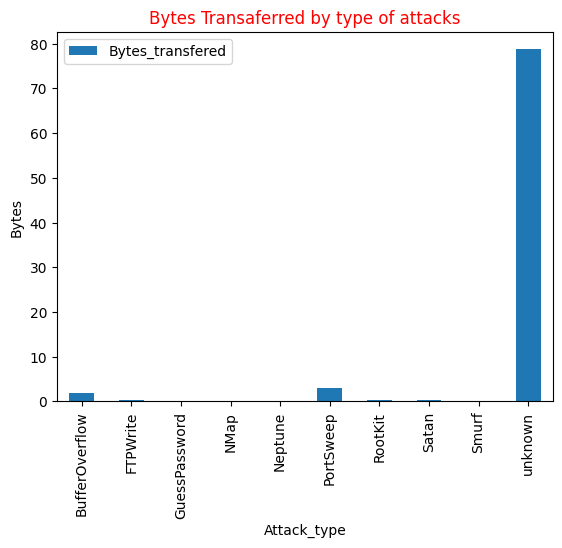

In [20]:
w=df.groupby(by=['Attack_type']).agg(Bytes_transfered=(' dst_bytes',sum))

w.drop(labels='Normal').plot(kind='bar')
plt.title("Bytes Transaferred by type of attacks",c='r')
plt.ylabel("Bytes")
plt.show()

In [21]:
df['Attack_type'].value_counts()

Attack_type
Normal            576710
Neptune           227228
Satan               5019
Smurf               3007
PortSweep           2964
NMap                1554
unknown              968
GuessPassword         53
BufferOverflow        30
RootKit               10
FTPWrite               8
Name: count, dtype: int64

#### The above dataset is imbalanced. Some classes have very low number of records.

In [22]:
#To balance the the data set putting some low classes in single merged class
balance ={'unknown':6,
 'BufferOverflow':6,
 'FTPWrite':6,
 'GuessPassword':6,
 'Neptune':1,
 'NMap':5,
 'Normal':0,
 'PortSweep':4,
 'RootKit':6,
 'Satan':2,
 'Smurf':3,
     }

In [23]:
df['Attack_coded']=df['Attack_type'].map(balance)

In [24]:
pd.DataFrame(df.std(numeric_only=True),columns=['std']).sort_values(by=['std'],ascending=True)

,std
num_outbound_cmds,0.000000
land,0.000000
is_host_login,0.000111
wrong_fragment,0.000332
urgent,0.000805
num_shells,0.001412
su_attempted,0.001412
num_failed_logins,0.001618
root_shell,0.001752
protocol_type,0.002596


### Remove columns with low standard deviation, as they provide very little information according to the above analysis

In [25]:
columns_to_drop = [" num_outbound_cmds", " land", " is_host_login", " wrong_fragment"]
df.drop(columns_to_drop, axis=1, inplace=True)


In [26]:
import pandas as pd

# Assuming num_df is your DataFrame containing numerical data
# Assuming 'attack_flag' is the target column

# Check the type of num_df
print(type(num_df))

# If num_df is not a DataFrame, convert it to DataFrame
if not isinstance(num_df, pd.DataFrame):
    # Assuming num_df is a Series or an Index object
    num_df = pd.DataFrame(num_df)

# Compute the absolute correlation of each feature with the target column 'attack_flag'
correlation = num_df.corrwith(num_df['attack_flag']).abs().sort_values(ascending=False)

# Convert the correlation series to a DataFrame
correlation_df = pd.DataFrame(correlation, columns=['correlation'])

# Display the DataFrame
print(correlation_df)


<class 'pandas.core.frame.DataFrame'>
                              correlation
attack_flag                      1.000000
 same_srv_rate                   0.965912
 flag                            0.951718
 dst_host_same_srv_rate          0.902920
 dst_host_srv_serror_rate        0.888492
 srv_error_rate                  0.887411
 dst_host_serror_rate            0.887263
 serror_rate                     0.886822
 dst_host_srv_count              0.854154
 logged_in                       0.852164
 count                           0.835341
 service                         0.712447
 dst_host_count                  0.536981
 dst_host_diff_srv_rate          0.399704
 diff_srv_rate                   0.345551
 dst_host_srv_diff_host_rate     0.271942
 srv_diff_host_rate              0.262455
 dst_bytes                       0.237695
 rerror_rate                     0.222727
 dst_host_srv_rerror_rate        0.220724
 srv_rerror_rate                 0.219622
 dst_host_rerror_rate            0.218

In [27]:
# Remove columns which have very low correlation with the target variable
low_corr_columns = correlation_df[correlation_df['correlation'] < 0.1].index

In [28]:
# Find the common columns between low_corr_columns and df.columns
columns_to_drop = low_corr_columns.intersection(df.columns)

# Remove the identified columns from the DataFrame
df.drop(columns_to_drop, axis=1, inplace=True)


In [29]:
df.columns

Index([' service', ' flag', ' dst_bytes', ' logged_in', ' count',
       ' serror_rate', ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate',
       ' same_srv_rate', ' diff_srv_rate', ' srv_diff_host_rate',
       ' dst_host_count', ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'Attack_type', 'attack_flag',
       'Attack_coded'],
      dtype='object')

In [30]:
y_binomial=df['attack_flag']
y_multinomial=df['Attack_coded']

In [31]:
df.drop(['attack_flag','Attack_type','Attack_coded'],axis=1,inplace =True)

### Binomial Classification

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df, y_binomial, test_size=0.33, random_state=42)

In [33]:
lr=LogisticRegression()
knc=KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='euclidean')

In [34]:
skf=SelectKBest(f_classif,k=10)

In [35]:
p1=Pipeline(steps=[
    ('Scaling',RobustScaler()), #RobustScaler is a useful scaling technique when dealing with datasets that contain outliers 
    ('Feature Selection',skf),
    ('Logestic Regression',lr)
])

p2=Pipeline(steps=[
    ('Scaling',RobustScaler()),
    ('Feature Selection',skf),
    ('RandomForest Classifier',RandomForestClassifier())
])

In [36]:
p1.fit(X_train,y_train)

Pipeline(steps=[('Scaling', RobustScaler()),
                ('Feature Selection', SelectKBest()),
                ('Logestic Regression', LogisticRegression())])

In [37]:
train_preds_pipe1 = p1.predict(X_train)
test_preds_pipe1 = p1.predict(X_test)

In [38]:
print("Accuracy train pipe1 :: ",accuracy_score(train_preds_pipe1, y_train))
print("Accuracy test pipe1 :: ",accuracy_score(test_preds_pipe1, y_test))
print("Precision train pipe1 :: ",precision_score(train_preds_pipe1, y_train))
print("Precision test pipe1 :: ",precision_score(test_preds_pipe1, y_test))
print("Recall train pipe1 :: ",recall_score(train_preds_pipe1, y_train))
print("Recall test pipe1 :: ",recall_score(test_preds_pipe1, y_test))

Accuracy train pipe1 ::  0.9938750435866869
Accuracy test pipe1 ::  0.9939768414185743
Precision train pipe1 ::  0.9827931147683141
Precision test pipe1 ::  0.9830339824168073
Recall train pipe1 ::  0.9963766750813208
Recall test pipe1 ::  0.9964506862432173


In [39]:
print(classification_report(train_preds_pipe1,y_train))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    388513
         1.0       0.98      1.00      0.99    159246

    accuracy                           0.99    547759
   macro avg       0.99      0.99      0.99    547759
weighted avg       0.99      0.99      0.99    547759



In [40]:
print(classification_report(test_preds_pipe1,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    191467
         1.0       0.98      1.00      0.99     78325

    accuracy                           0.99    269792
   macro avg       0.99      0.99      0.99    269792
weighted avg       0.99      0.99      0.99    269792



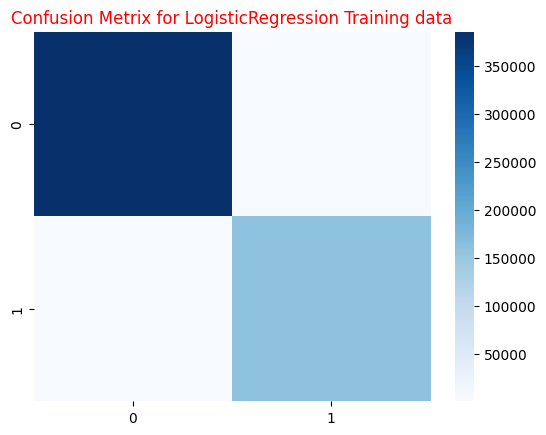

In [41]:
sns.heatmap(data=confusion_matrix(train_preds_pipe1, y_train),cmap='Blues')
plt.title("Confusion Metrix for LogisticRegression Training data",c='r')
plt.show()

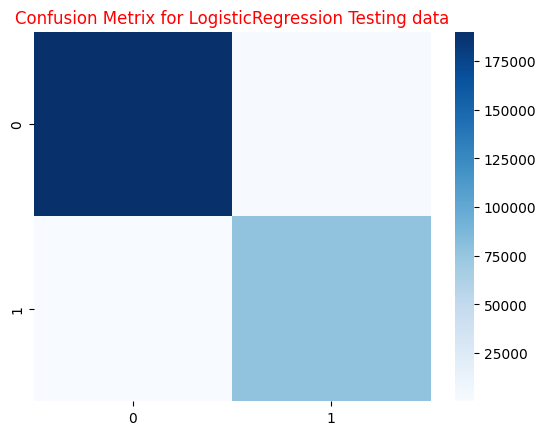

In [42]:
sns.heatmap(data=confusion_matrix(test_preds_pipe1,y_test),cmap='Blues')
plt.title("Confusion Metrix for LogisticRegression Testing data",c='r')
plt.show()

In [43]:
p2.fit(X_train,y_train)

Pipeline(steps=[('Scaling', RobustScaler()),
                ('Feature Selection', SelectKBest()),
                ('RandomForest Classifier', RandomForestClassifier())])

In [44]:
train_preds_pipe2 = p2.predict(X_train)
test_preds_pipe2 = p2.predict(X_test)

In [45]:
print("Accuracy train pipe2 :: ",accuracy_score(train_preds_pipe2, y_train))
print("Accuracy test pipe2 :: ",accuracy_score(test_preds_pipe2, y_test))
print("Precision train pipe2 :: ",precision_score(train_preds_pipe2, y_train))
print("Precision test pipe2 :: ",precision_score(test_preds_pipe2, y_test))
print("Recall train pipe2 :: ",recall_score(train_preds_pipe2, y_train))
print("Recall test pipe2 :: ",recall_score(test_preds_pipe2, y_test))

Accuracy train pipe2 ::  0.997376583497487
Accuracy test pipe2 ::  0.9963564523781283
Precision train pipe2 ::  0.9922575210440578
Precision test pipe2 ::  0.9907927551200343
Recall train pipe2 ::  0.9988340482841181
Recall test pipe2 ::  0.9968066907432047


In [46]:
print(classification_report(train_preds_pipe2,y_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    387375
         1.0       0.99      1.00      1.00    160384

    accuracy                           1.00    547759
   macro avg       1.00      1.00      1.00    547759
weighted avg       1.00      1.00      1.00    547759



In [47]:
print(classification_report(test_preds_pipe2,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    190877
         1.0       0.99      1.00      0.99     78915

    accuracy                           1.00    269792
   macro avg       0.99      1.00      1.00    269792
weighted avg       1.00      1.00      1.00    269792



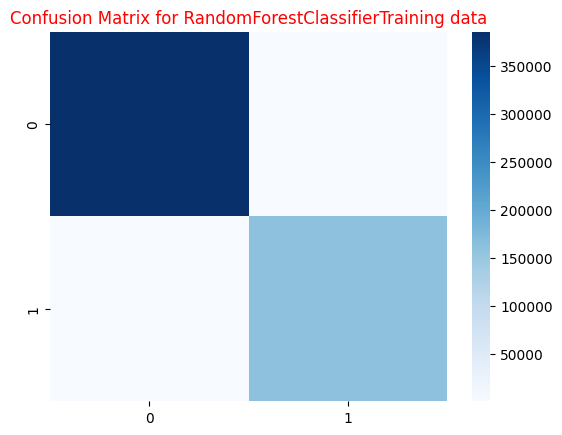

In [48]:
sns.heatmap(data=confusion_matrix(train_preds_pipe2, y_train),cmap='Blues')
plt.title("Confusion Matrix for RandomForestClassifierTraining data",c='r')
plt.show()

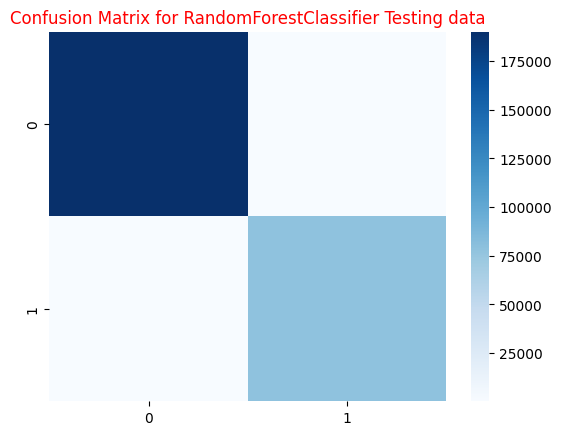

In [49]:
sns.heatmap(data=confusion_matrix(test_preds_pipe2,y_test),cmap='Blues')
plt.title("Confusion Matrix for RandomForestClassifier Testing data",c='r')
plt.show()

Both pipelines perform exceptionally well, exhibiting high accuracy, precision, and recall on both the training and test sets. However, Pipe2, which utilizes the RandomForest Classifier, generally demonstrates slightly superior performance in terms of accuracy, precision, and recall compared to Pipe1, which employs Logistic Regression. Hence, we opt to utilize Pipe2, employing the RandomForest Classifier, for making predictions

In [50]:
pred=pd.DataFrame(p2.predict(df))

In [51]:
df['Pred_attack_flag']=pred

#

## Multinomial Classification

In [52]:
rfc=RandomForestClassifier()
adab=AdaBoostClassifier()

In [53]:
p3=Pipeline(steps=[
    ('Scaling',RobustScaler()), #RobustScaler is a useful scaling technique when dealing with datasets that contain outliers 
    ('Feature Selection',skf),
    ('RandomForestClassifier',rfc)
    ])

p4=Pipeline(steps=[
    ('Scaling',RobustScaler()),
    ('Feature Selection',skf),
    ('AdaBoostClassifier',adab)
    ])

In [54]:
p3.fit(X_train,y_train)

Pipeline(steps=[('Scaling', RobustScaler()),
                ('Feature Selection', SelectKBest()),
                ('RandomForestClassifier', RandomForestClassifier())])

In [55]:
train_preds_pipe3 = p3.predict(X_train)
test_preds_pipe3 = p3.predict(X_test)

In [56]:
print("Accuracy train pipe3 :: ",accuracy_score(train_preds_pipe3, y_train))
print("Accuracy test pipe3 :: ",accuracy_score(test_preds_pipe3, y_test))
print("Precision train pipe3 :: ",precision_score(train_preds_pipe3, y_train,average=None))
print("Precision test pipe3 :: ",precision_score(test_preds_pipe3, y_test,average=None))
print("Recall train pipe3 :: ",recall_score(train_preds_pipe3, y_train,average=None))
print("Recall test pipe3 :: ",recall_score(test_preds_pipe3, y_test,average=None))

Accuracy train pipe3 ::  0.997376583497487
Accuracy test pipe3 ::  0.9963267999051121
Precision train pipe3 ::  [0.99952111 0.99224513]
Precision test pipe3 ::  [0.99868696 0.9906668 ]
Recall train pipe3 ::  [0.99676802 0.99884649]
Recall test pipe3 ::  [0.99611816 0.99683155]


In [57]:
print(classification_report(train_preds_pipe3,y_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    387379
         1.0       0.99      1.00      1.00    160380

    accuracy                           1.00    547759
   macro avg       1.00      1.00      1.00    547759
weighted avg       1.00      1.00      1.00    547759



In [58]:
print(classification_report(test_preds_pipe3,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    190889
         1.0       0.99      1.00      0.99     78903

    accuracy                           1.00    269792
   macro avg       0.99      1.00      1.00    269792
weighted avg       1.00      1.00      1.00    269792



In [59]:
p4.fit(X_train,y_train)

Pipeline(steps=[('Scaling', RobustScaler()),
                ('Feature Selection', SelectKBest()),
                ('AdaBoostClassifier', AdaBoostClassifier())])

In [60]:
train_preds_pipe4 = p4.predict(X_train)
test_preds_pipe4 = p4.predict(X_test)

In [61]:
print("Accuracy train pipe4 :: ",accuracy_score(train_preds_pipe4, y_train))
print("Accuracy test pipe4 :: ",accuracy_score(test_preds_pipe4, y_test))
print("Precision train pipe4 :: ",precision_score(train_preds_pipe4, y_train,average=None))
print("Precision test pipe4 :: ",precision_score(test_preds_pipe4, y_test,average=None))
print("Recall train pipe4 :: ",recall_score(train_preds_pipe4, y_train,average=None))
print("Recall test pipe4 :: ",recall_score(test_preds_pipe4, y_test,average=None))

Accuracy train pipe4 ::  0.9940557800054404
Accuracy test pipe4 ::  0.9941436365792907
Precision train pipe4 ::  [0.99841061 0.9836355 ]
Precision test pipe4 ::  [0.99838234 0.98397864]
Recall train pipe4 ::  [0.99319668 0.99614851]
Recall test pipe4 ::  [0.99335291 0.99607293]


In [62]:
print(classification_report(train_preds_pipe4,y_train))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    388340
         1.0       0.98      1.00      0.99    159419

    accuracy                           0.99    547759
   macro avg       0.99      0.99      0.99    547759
weighted avg       0.99      0.99      0.99    547759



In [63]:
print(classification_report(test_preds_pipe4,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    191362
         1.0       0.98      1.00      0.99     78430

    accuracy                           0.99    269792
   macro avg       0.99      0.99      0.99    269792
weighted avg       0.99      0.99      0.99    269792



Pipe3, utilizing the RandomForestClassifier, exhibits higher accuracy, precision, and recall values compared to Pipe4, employing the AdaBoostClassifier, on both the training and test sets. Hence, we opt to use Pipe3, employing the RandomForestClassifier, for making predictions

In [64]:
pred = pd.DataFrame(p3.predict(df.drop('Pred_attack_flag', axis=1)))

In [65]:
df['Pred_attack_coded']=pred

In [66]:
df['Attack_flag']=y_binomial

In [67]:
df['Attack_coded']=y_multinomial

In [68]:
df

,service,flag,dst_bytes,logged_in,count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Pred_attack_flag,Pred_attack_coded,Attack_flag,Attack_coded
0,0.00,0.0,0.08314,0.1,0.001,0.0,0.0,0.0,0.050,0.1,...,0.100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6
1,0.00,0.0,0.08314,0.1,0.002,0.0,0.0,0.0,0.033,0.1,...,0.050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6
2,0.00,0.0,0.08314,0.1,0.003,0.0,0.0,0.0,0.025,0.1,...,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6
3,0.00,0.0,0.08314,0.1,0.004,0.0,0.0,0.0,0.000,0.1,...,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6
4,0.00,0.0,0.08314,0.1,0.004,0.0,0.0,0.0,0.000,0.1,...,0.020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.09,0.0,0.00000,0.0,0.251,0.0,0.0,0.0,0.000,0.1,...,0.098,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3
3003,0.09,0.0,0.00000,0.0,0.252,0.0,0.0,0.0,0.000,0.1,...,0.099,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3
3004,0.09,0.0,0.00000,0.0,0.253,0.0,0.0,0.0,0.000,0.1,...,0.099,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3
3005,0.09,0.0,0.00000,0.0,0.254,0.0,0.0,0.0,0.000,0.1,...,0.100,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3
